In [16]:
#Install the BOM package
import pip
pip.main(["install", "--upgrade", "git+https://github.com/jonmarty/Web-Scrapper-for-Australian-Bureau-of-Meteorology-Site"])

  Cloning https://github.com/jonmarty/Web-Scrapper-for-Australian-Bureau-of-Meteorology-Site to c:\users\jonathan\appdata\local\temp\pip-kqjzdxts-build
  Found existing installation: BOM 0.0.1
    Can't uninstall 'BOM'. No files were found to uninstall.
  Running setup.py install for BOM: started
    Running setup.py install for BOM: finished with status 'done'


You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


0

In [22]:
from BOM import ExtractBOM
noarlunga = ExtractBOM("sa", "adelaide", "Noarlunga")
mount_lofty = ExtractBOM("sa", "adelaide", "Mount Lofty")
temp = {
    "Noarlunga":noarlunga.extractByField("Temp", float)[0:162],
    "Mount Lofty":mount_lofty.extractByField("Temp", float)
}

print(len(temp["Noarlunga"]))
print(len(temp["Mount Lofty"]))
print(temp)

162
162
{'Noarlunga': [11.6, 11.8, 11.7, 11.7, 11.8, 11.6, 11.7, 11.3, 11.0, 11.1, 11.0, 10.9, 11.0, 10.9, 10.7, 10.2, 10.4, 10.6, 10.8, 10.9, 10.7, 10.8, 10.4, 10.5, 10.2, 9.6, 11.2, 11.3, 11.1, 11.2, 11.5, 11.4, 10.4, 10.8, 10.8, 10.6, 10.0, 10.0, 11.1, 10.0, 8.6, 8.7, 9.6, 10.4, 10.6, 10.9, 11.8, 12.5, 12.6, 12.1, 12.0, 11.1, 11.3, 10.3, 10.2, 10.7, 10.7, 10.2, 9.7, 9.8, 9.2, 10.1, 9.5, 9.4, 9.3, 8.7, 8.2, 8.6, 8.3, 9.3, 8.7, 8.9, 10.9, 10.8, 10.8, 10.7, 10.5, 10.3, 9.2, 10.9, 10.9, 10.7, 10.6, 10.6, 10.7, 10.8, 10.8, 12.0, 12.3, 13.0, 13.0, 13.0, 13.3, 13.5, 13.4, 13.4, 13.3, 13.0, 13.0, 12.9, 12.9, 12.6, 12.6, 12.4, 12.5, 12.2, 12.2, 12.2, 12.1, 12.2, 12.1, 12.8, 11.5, 11.8, 12.6, 12.1, 11.8, 11.4, 11.0, 10.9, 10.9, 10.5, 10.2, 10.2, 10.3, 10.5, 10.5, 10.3, 10.0, 9.9, 9.7, 9.6, 9.7, 10.2, 10.0, 10.0, 10.1, 10.0, 9.2, 9.5, 8.6, 8.8, 9.9, 8.8, 10.2, 10.8, 10.6, 9.8, 9.6, 9.8, 10.7, 10.2, 9.8, 10.0, 10.6, 10.1, 9.1, 9.7, 9.9, 10.4, 9.4, 9.3], 'Mount Lofty': [6.1, 6.0, 5.8, 5.7, 5.5, 

###### With this data, we can apply a number of statistical methods

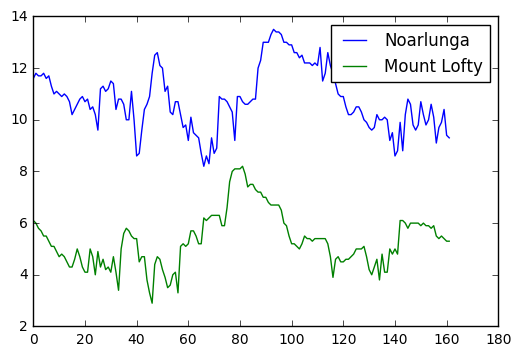

In [23]:
import matplotlib.pyplot as plt
x, = plt.plot(temp["Noarlunga"], label = "Noarlunga")
y, = plt.plot(temp["Mount Lofty"], label = "Mount Lofty")
plt.legend(handles = [x, y])
plt.title("Temperature")
plt.show()
plt.close()

In [20]:
spd = {
    "Noarlunga":noarlunga.extractByField("Spd km/h", float)[0:162],
    "Mount Lofty":mount_lofty.extractByField("Spd km/h", float)
}
print(spd)

{'Noarlunga': [19.0, 22.0, 19.0, 17.0, 22.0, 19.0, 20.0, 17.0, 17.0, 19.0, 22.0, 24.0, 26.0, 20.0, 20.0, 17.0, 20.0, 26.0, 30.0, 28.0, 28.0, 28.0, 28.0, 30.0, 24.0, 28.0, 33.0, 28.0, 28.0, 26.0, 26.0, 24.0, 33.0, 28.0, 28.0, 32.0, 33.0, 35.0, 33.0, 32.0, 37.0, 35.0, 37.0, 35.0, 33.0, 39.0, 39.0, 33.0, 30.0, 32.0, 32.0, 28.0, 30.0, 32.0, 33.0, 28.0, 26.0, 22.0, 20.0, 22.0, 24.0, 32.0, 20.0, 20.0, 20.0, 24.0, 17.0, 22.0, 30.0, 28.0, 17.0, 15.0, 20.0, 22.0, 19.0, 17.0, 19.0, 19.0, 24.0, 24.0, 22.0, 20.0, 30.0, 24.0, 26.0, 30.0, 32.0, 48.0, 46.0, 35.0, 32.0, 32.0, 32.0, 37.0, 33.0, 37.0, 35.0, 33.0, 35.0, 35.0, 37.0, 32.0, 32.0, 32.0, 33.0, 32.0, 32.0, 33.0, 37.0, 41.0, 32.0, 32.0, 33.0, 33.0, 32.0, 33.0, 32.0, 30.0, 28.0, 28.0, 26.0, 26.0, 26.0, 26.0, 22.0, 28.0, 22.0, 24.0, 20.0, 20.0, 17.0, 28.0, 26.0, 20.0, 17.0, 19.0, 20.0, 19.0, 15.0, 15.0, 26.0, 30.0, 15.0, 20.0, 19.0, 28.0, 19.0, 22.0, 28.0, 30.0, 26.0, 24.0, 32.0, 30.0, 28.0, 24.0, 22.0, 20.0, 39.0, 30.0, 24.0, 28.0], 'Mount Lofty

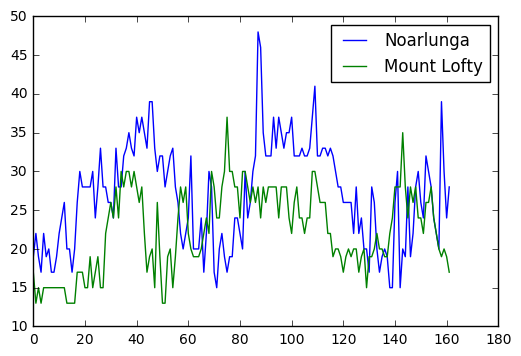

In [24]:
x, = plt.plot(spd["Noarlunga"], label = "Noarlunga")
y, = plt.plot(spd["Mount Lofty"], label = "Mount Lofty")
plt.legend(handles = [x, y])
plt.title("Wind Speed in km/h")
plt.show()
plt.close()

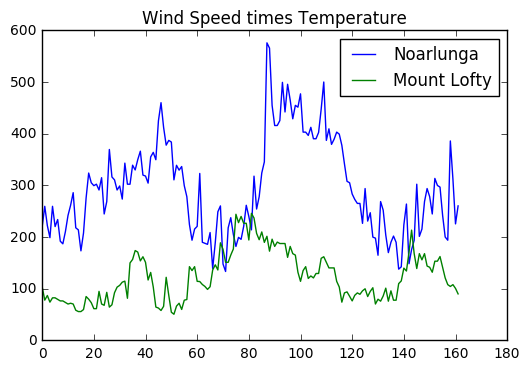

In [26]:
x, = plt.plot([a*b for a,b in zip(temp["Noarlunga"], spd["Noarlunga"])], label = "Noarlunga")
y, = plt.plot([a*b for a,b in zip(temp["Mount Lofty"], spd["Mount Lofty"])], label = "Mount Lofty")
plt.legend(handles = [x, y])
plt.title("Wind Speed Times Temperature")
plt.show()
plt.close()

In [12]:
#pip.main(["uninstall", "BOM"])

Can't uninstall 'BOM'. No files were found to uninstall.


You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


0